In [1]:
import seaborn as sns
import pandas as pd
%matplotlib inline

In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv("With_start_time.csv")

In [3]:
df

,Round_name,Run_id,Vid,Start_edge,destination,Route,start_time,Est_travel_time,#_Sharing_route,#_of_edges,Route_length,Travel_time
0,analyze0,STRBE_Collector,2,318908683#0,422688976#1,"['318908683#0', '229169572#1', '229169572#5', ...",0.0,33.164147,194,6,850.24,111.0
1,analyze0,STRBE_Collector,3,422685671#2,-105681660#20,"['422685671#2', '422685679#0', '229169572#1', ...",0.2,73.550499,202,7,1734.24,115.0
2,analyze0,STRBE_Collector,4,318908683#0,-597602756#0,"['318908683#0', '229169572#1', '229169572#5', ...",0.4,59.909234,236,8,1300.17,114.0
3,analyze0,STRBE_Collector,5,422685671#2,422688976#1,"['422685671#2', '422685679#0', '229169572#1', ...",0.6,43.937725,194,7,1220.59,109.0
4,analyze0,STRBE_Collector,6,318908683#0,918280984,"['318908683#0', '229169572#1', '229169572#5', ...",0.8,25.357451,192,6,594.65,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9740,analyze24,STRBE_Collector,476,597602756#0,422688976#1,"['597602756#0', '597602756#1', '597602756#2', ...",94.8,87.907677,230,14,1952.30,756.0
9741,analyze24,STRBE_Collector,477,105681660#12,-597602753#1,"['105681660#12', '-597602753#13', '-597602753#...",95.0,61.151665,131,5,1358.79,355.0
9742,analyze24,STRBE_Collector,478,105681660#12,-318908683#1,"['105681660#12', '961870460', '-597602756#9', ...",95.2,85.218056,225,11,1703.70,861.0
9743,analyze24,STRBE_Collector,479,918280985,-105681660#20,"['918280985', '261136891#3', '-15382203#1', '9...",95.4,71.510849,148,6,1295.49,100.0


In [4]:
df.corr()

,Vid,start_time,Est_travel_time,#_Sharing_route,#_of_edges,Route_length,Travel_time
Vid,1.000000,1.000000,-0.001976,0.137389,-0.003174,-0.000366,0.280440
start_time,1.000000,1.000000,-0.001976,0.137389,-0.003174,-0.000366,0.280440
Est_travel_time,-0.001976,-0.001976,1.000000,0.265435,0.407504,0.880184,0.150513
#_Sharing_route,0.137389,0.137389,0.265435,1.000000,0.463813,0.417306,0.272139
#_of_edges,-0.003174,-0.003174,0.407504,0.463813,1.000000,0.546012,0.290695
Route_length,-0.000366,-0.000366,0.880184,0.417306,0.546012,1.000000,0.267493
Travel_time,0.280440,0.280440,0.150513,0.272139,0.290695,0.267493,1.000000


<AxesSubplot:>

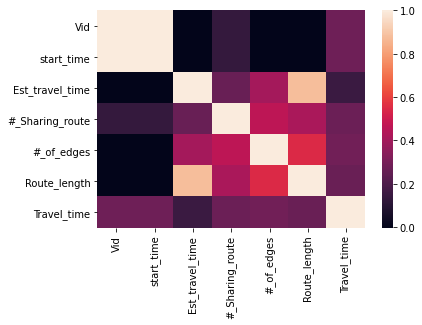

In [5]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Travel_time'>

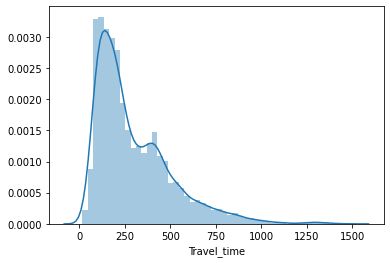

In [6]:
df.dropna(inplace=True)
sns.distplot(df['Travel_time'])

In [7]:
import pandas as pd
import numpy as np
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




class Time_predictors():

    def __init__(self,net_map):
      
        Route_info = pd.read_csv("./core/Time_estimation/maps/"+net_map+"/With_start_time.csv")
       

        #####from non-real-time beginning route predition#####
        Route_info.replace([np.inf, -np.inf], np.nan, inplace=True)
        Route_info.dropna(inplace=True)

        X = Route_info[['start_time','Est_travel_time','#_Sharing_route',"Route_length"]]
        y = Route_info[['Travel_time']]


        self.Static_route_predictor = KNeighborsRegressor(n_neighbors=5)

        self.Static_route_predictor.fit(X,y)

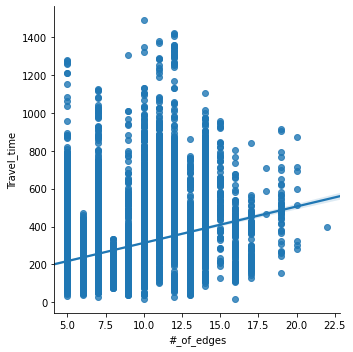

In [8]:
sns.lmplot(x='#_of_edges',y='Travel_time',data=df)

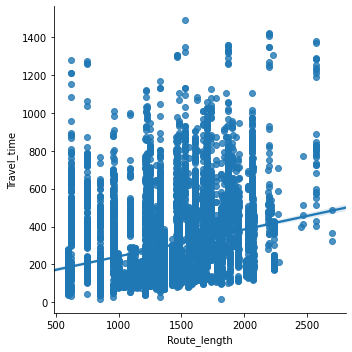

In [11]:
sns.lmplot(x='Route_length',y='Travel_time',data=df)

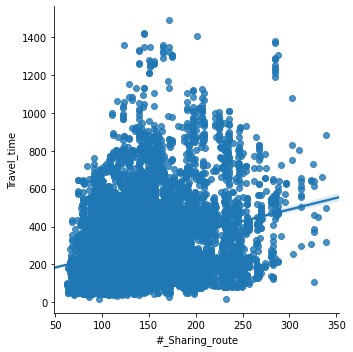

In [12]:
sns.lmplot(x='#_Sharing_route',y='Travel_time',data=df)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [18]:
from sklearn.model_selection import train_test_split
X = df[['start_time','Est_travel_time','#_Sharing_route',"Route_length"]]
y = df[['Travel_time']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 2.21274424 -3.22345496  0.49941226  0.26950304]]


In [21]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

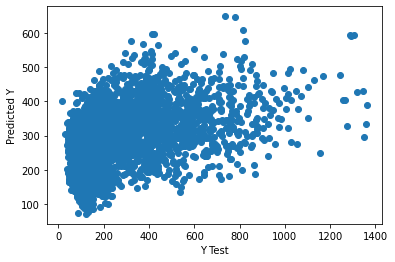

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 139.57021566405786
MSE: 35883.48642923181
RMSE: 189.42937055597216


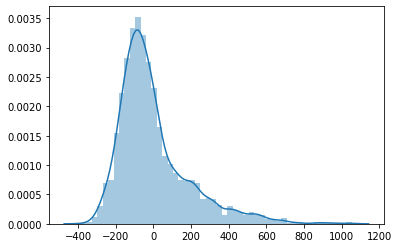

In [25]:
sns.distplot((y_test-predictions),bins=50);